In [1]:
import pandas as pd
data = pd.read_csv('D:/datasets/Asthma-Predicition-Using-Machine-Learning-and-Internet-of-Things--main/Asthma-Predicition-Using-Machine-Learning-and-Internet-of-Things--main/PEFR_Data_Set.csv')

In [2]:
data.shape

(54, 8)

In [3]:
data.head()

,Age,Height,Gender,Outdoor Temperature,Humidity,PM 2.5,PM 10,PEFR
0,19,155,1,33,60,16,23.62,524
1,26,183,1,32,71,12,18.29,640
2,22,153,0,27,85,27,38.29,356
3,25,160,0,26,88,18,26.20,402
4,18,162,0,26,85,16,23.62,424


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  54 non-null     int64  
 1   Height               54 non-null     int64  
 2   Gender               54 non-null     int64  
 3   Outdoor Temperature  54 non-null     int64  
 4   Humidity             54 non-null     int64  
 5   PM 2.5               54 non-null     int64  
 6   PM 10                54 non-null     float64
 7   PEFR                 54 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 3.5 KB


In [5]:
data.describe()

,Age,Height,Gender,Outdoor Temperature,Humidity,PM 2.5,PM 10,PEFR
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,26.944444,163.055556,0.537037,28.314815,75.759259,22.537037,33.669630,495.388889
std,8.598852,14.891325,0.503308,4.450245,12.184022,7.388704,9.020479,90.195891
min,15.000000,140.000000,0.000000,20.000000,52.000000,12.000000,18.000000,302.000000
25%,22.000000,150.500000,0.000000,25.000000,64.000000,16.500000,27.175000,435.000000
50%,25.000000,160.000000,1.000000,27.000000,78.500000,21.000000,32.500000,492.000000
75%,29.000000,176.000000,1.000000,32.000000,86.000000,26.000000,39.000000,578.000000
max,65.000000,195.000000,1.000000,36.000000,95.000000,38.000000,52.800000,651.000000


In [6]:
data.isnull().sum()

Age                    0
Height                 0
Gender                 0
Outdoor Temperature    0
Humidity               0
PM 2.5                 0
PM 10                  0
PEFR                   0
dtype: int64

In [7]:
data['Gender_abc'] = data['Gender'].map({0:'Female', 1:'Male'})

In [8]:
data['Gender_abc'].value_counts()

Male      29
Female    25
Name: Gender_abc, dtype: int64

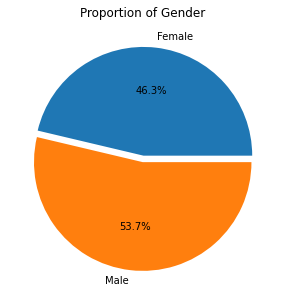

In [9]:
import matplotlib.pyplot as plt

x = data['Gender_abc'].value_counts().sort_values()

plt.figure(figsize=(5, 5))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03])
plt.title('Proportion of Gender')

plt.show()

In [10]:
X=data[['Gender','Outdoor Temperature','Humidity', 'PM 2.5 ', 'PM 10']]
y=data['PEFR']

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X,y)
predicted = dt_model.predict(X)

In [13]:
g=int(input("Enter Gender 1-Male 0-Female"))
p=float(input('Enter Temperature C:'))
q=float(input('Enter Humidity %:'))
r=float(input('Enter PM 2.5 Value:'))
s=float(input('Enter PM 10 Value:'))
prediction = dt_model.predict([[g,p,q,r,s]])
predicted_pefr = prediction[0]
actual_pefr = float(input("Enter Actual PEFR value"))
print(predicted_pefr)
perpefr = (actual_pefr/predicted_pefr)*100
print(perpefr)
if perpefr >= 80:
    print('SAFE')
elif perpefr >= 50:
    print('MODERATE')
else:
    print('RISK')

Enter Gender 1-Male 0-Female0
Enter Temperature C:30
Enter Humidity %:34
Enter PM 2.5 Value:42
Enter PM 10 Value:21


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Enter Actual PEFR value352
399
88.22055137844612
SAFE
